# SECTION 1: SETUP AND INSTALLATIONS

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn plotly

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [ ]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


# SECTION 2: DATA LOADING AND INITIAL EXPLORATION

In [ ]:
# Upload your CSV file in Google Colab
from google.colab import files
uploaded = files.upload()

Saving EmployeesInfo.csv to EmployeesInfo (1).csv


In [ ]:
# Get the filename
filename = list(uploaded.keys())[0]
print(f"Uploaded file: {filename}")

Uploaded file: EmployeesInfo (1).csv


In [ ]:
# Load the dataset
df = pd.read_csv(filename)

In [ ]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

Dataset Shape: (48842, 15)

First 5 rows:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0 

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


# SECTION 3: DATA PREPROCESSING

In [ ]:
# Assuming the last column (14th) is the target variable (salary)
# Let's identify the target column
target_column = df.columns[-1]  # Last column
feature_columns = df.columns[:-1]  # First 13 columns

print(f"Target Column: {target_column}")
print(f"Feature Columns: {feature_columns.tolist()}")

Target Column: income
Feature Columns: ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [ ]:
# Separate features and target
X = df[feature_columns].copy()  # Use copy to avoid warnings
y = df[target_column].copy()

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (48842, 14)
Target shape: (48842,)


In [ ]:
# Check data types
print(f"\nTarget variable data type: {y.dtype}")
print(f"Target variable sample values: {y.head()}")


Target variable data type: object
Target variable sample values: 0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: income, dtype: object


In [ ]:
# Clean target variable - handle non-numeric values
print("\nCleaning target variable...")
if y.dtype == 'object':
    # Remove currency symbols, commas, and convert to numeric
    y = y.astype(str).str.replace('$', '', regex=False)
    y = y.str.replace(',', '', regex=False)
    y = y.str.replace(' ', '', regex=False)
    y = y.str.strip()

    # Convert to numeric, coerce errors to NaN
    y = pd.to_numeric(y, errors='coerce')

    # Handle NaN values in target
    if y.isnull().sum() > 0:
        print(f"Found {y.isnull().sum()} NaN values in target, filling with median")
        y.fillna(y.median(), inplace=True)

print(f"Target variable after cleaning - dtype: {y.dtype}")
print(f"Target variable after cleaning - sample values: {y.head()}")



Cleaning target variable...
Found 48842 NaN values in target, filling with median
Target variable after cleaning - dtype: float64
Target variable after cleaning - sample values: 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: income, dtype: float64


In [ ]:
# Debug: Check data shapes before preprocessing
print(f"\nBefore preprocessing:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")


Before preprocessing:
X shape: (48842, 14)
y shape: (48842,)

Numerical columns: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


In [ ]:
# Handle missing values
print("\nHandling missing values...")
print(f"Missing values before cleaning: {X.isnull().sum().sum()}")


Handling missing values...
Missing values before cleaning: 0


In [ ]:
# For numerical columns, fill with median
for col in numerical_cols:
    if col in X.columns and X[col].isnull().sum() > 0:
        median_val = X[col].median()
        X[col].fillna(median_val, inplace=True)
        print(f"Filled {col} missing values with median: {median_val}")

In [ ]:
# For categorical columns, fill with mode
for col in categorical_cols:
    if col in X.columns and X[col].isnull().sum() > 0:
        mode_val = X[col].mode()[0] if len(X[col].mode()) > 0 else 'Unknown'
        X[col].fillna(mode_val, inplace=True)
        print(f"Filled {col} missing values with mode: {mode_val}")

In [ ]:
# Additional data cleaning for features
for col in X.columns:
    if X[col].dtype == 'object':
        # Clean string columns
        X[col] = X[col].astype(str).str.strip()
        # Replace empty strings with NaN and then fill
        X[col] = X[col].replace('', np.nan)
        X[col] = X[col].replace('nan', np.nan)  # Handle string 'nan'

        if X[col].isnull().sum() > 0:
            mode_val = X[col].mode()[0] if len(X[col].mode()) > 0 else 'Unknown'
            X[col].fillna(mode_val, inplace=True)

print("Missing values handled!")
print(f"Missing values after cleaning: {X.isnull().sum().sum()}")

# Encode categorical variables
print("\nEncoding categorical variables...")
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    if col in X.columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le
        print(f"Encoded {col}: {len(le.classes_)} unique values")

# Create X_processed for scaling
X_processed = X.copy()

print(f"\nFinal preprocessing results:")
print(f"X_processed shape: {X_processed.shape}")
print(f"y shape: {y.shape}")
print(f"Missing values in X_processed: {X_processed.isnull().sum().sum()}")
print(f"Missing values in y: {y.isnull().sum()}")
print(f"Data types in X_processed:\n{X_processed.dtypes}")

# Now you can safely proceed with scaling
if len(X_processed) > 0:
    print("\nProceeding with feature scaling...")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_processed)
    X_scaled = pd.DataFrame(X_scaled, columns=X_processed.columns)
    print(f"Features scaled successfully! Shape: {X_scaled.shape}")
else:
    print("ERROR: No samples remaining after preprocessing!")

Missing values handled!
Missing values after cleaning: 0

Encoding categorical variables...
Encoded workclass: 9 unique values
Encoded education: 16 unique values
Encoded marital-status: 7 unique values
Encoded occupation: 15 unique values
Encoded relationship: 6 unique values
Encoded race: 5 unique values
Encoded gender: 2 unique values
Encoded native-country: 42 unique values

Final preprocessing results:
X_processed shape: (48842, 14)
y shape: (48842,)
Missing values in X_processed: 0
Missing values in y: 48842
Data types in X_processed:
age                int64
workclass          int64
fnlwgt             int64
education          int64
educational-num    int64
marital-status     int64
occupation         int64
relationship       int64
race               int64
gender             int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int64
dtype: object

Proceeding with feature scaling...
Features scaled successfully! Shape: (48842, 14)


# SECTION 4: EXPLORATORY DATA ANALYSIS

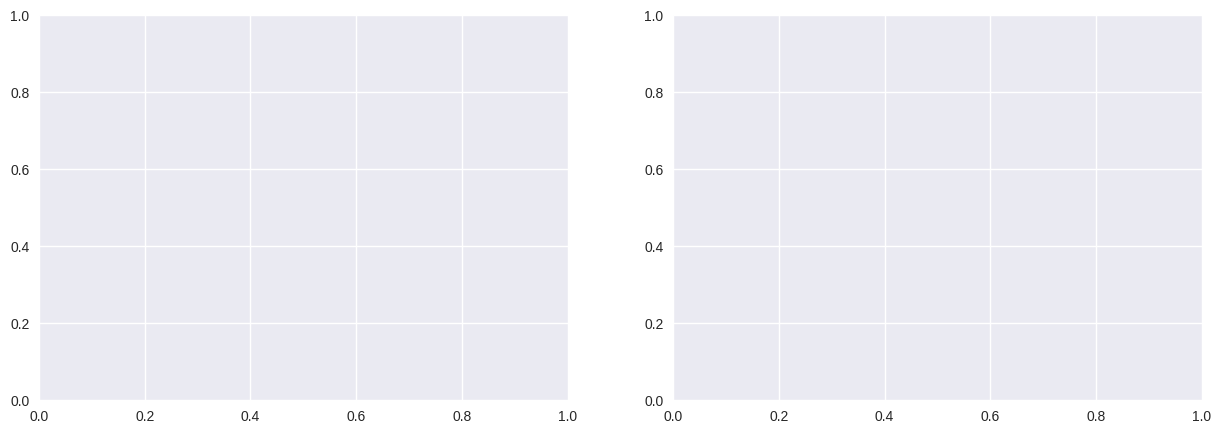

In [ ]:
# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

In [ ]:
# Target variable distribution
# Since the target variable 'income' is categorical, we should encode it for plotting numerical distributions
try:
    # Use LabelEncoder to encode the target variable
    income_le = LabelEncoder()
    y_encoded = income_le.fit_transform(y)

    # Histogram of encoded target variable
    axes[0].hist(y_encoded, bins=len(income_le.classes_), alpha=0.7, color='skyblue')
    axes[0].set_title('Distribution of Encoded Income Categories')
    axes[0].set_xlabel('Encoded Income Category')
    axes[0].set_ylabel('Frequency')
    axes[0].set_xticks(range(len(income_le.classes_)))
    axes[0].set_xticklabels(income_le.classes_)
except Exception as e:
    print(f"Error creating histogram: {e}")
    axes[0].text(0.5, 0.5, f'Error: {e}', transform=axes[0].transAxes, ha='center')

# Keep the box plot code as is, but it might not be meaningful for encoded categories
# Consider removing or modifying the box plot if it doesn't provide useful insights for a categorical target

In [ ]:
# Box plot
# # Quick fix for the data type error
# y = pd.to_numeric(y.astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')
# y = y.dropna()
# X = X.loc[y.index]  # Keep matching rows

# # Now try the box plot again
try:
    # Convert to numeric if needed
    y_numeric = pd.to_numeric(y, errors='coerce')
    y_clean = y_numeric.dropna()

    axes[1].boxplot(y_clean)
    axes[1].set_title('Box Plot of Salary')
    axes[1].set_ylabel('Salary')
except Exception as e:
    print(f"Error creating box plot: {e}")
    axes[1].text(0.5, 0.5, f'Error: {e}', transform=axes[1].transAxes, ha='center')

plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

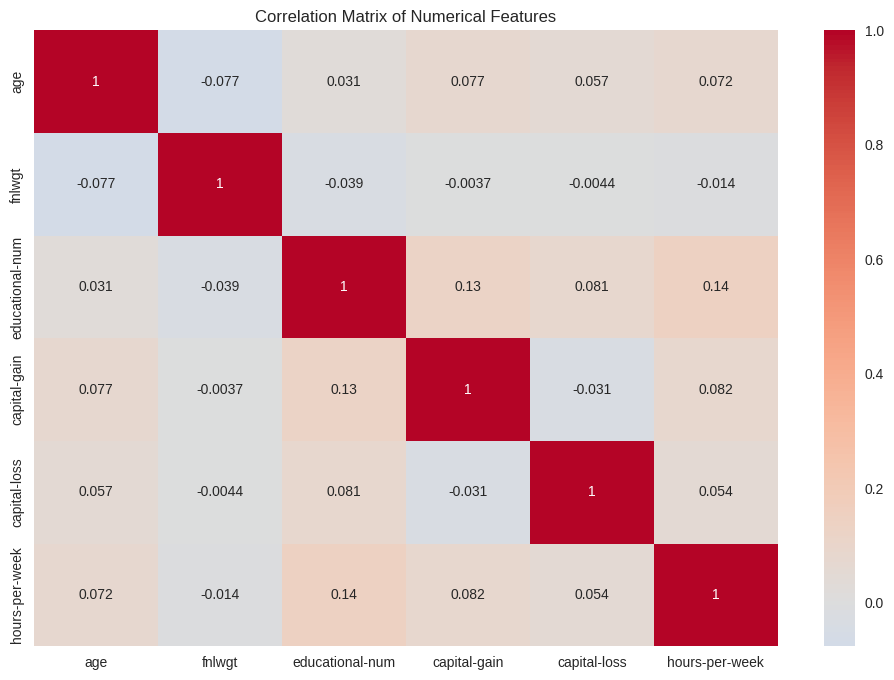

In [ ]:
# Correlation matrix for numerical features
if len(numerical_cols) > 1:
    plt.figure(figsize=(12, 8))
    correlation_matrix = X[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

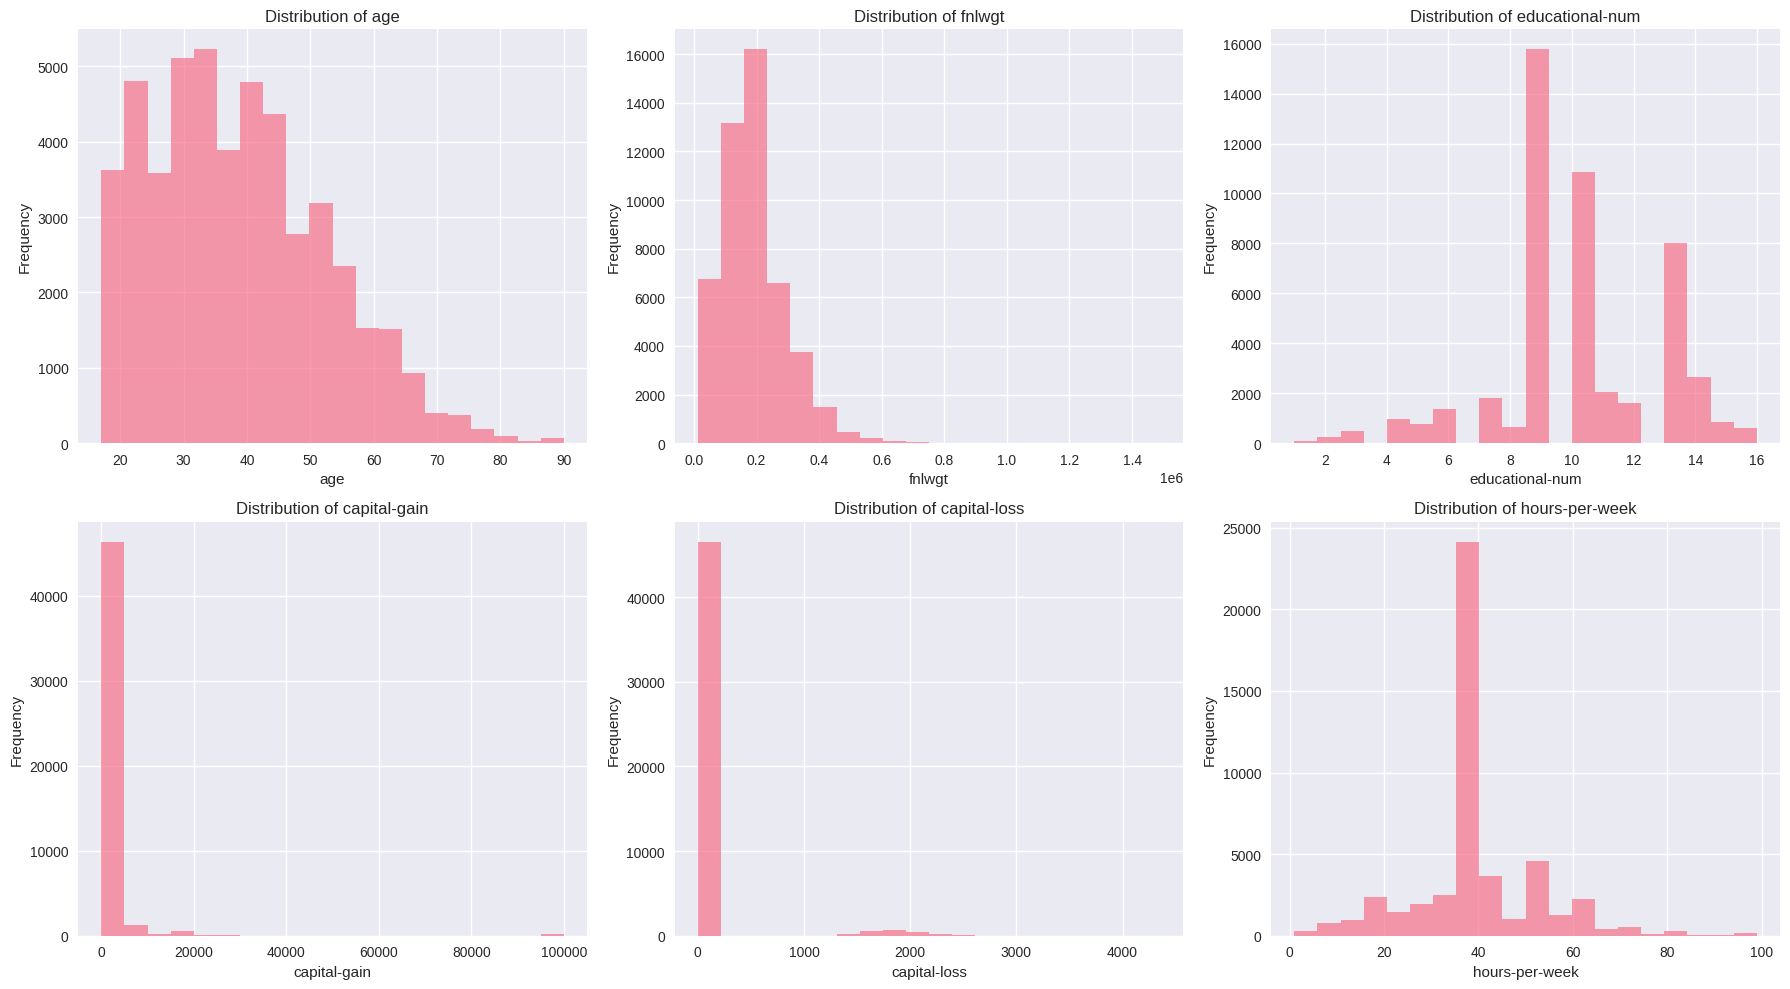

In [ ]:
# Feature distributions
if len(numerical_cols) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()

    for i, col in enumerate(numerical_cols[:6]):  # Show first 6 numerical columns
        if i < len(axes):
            axes[i].hist(X[col], bins=20, alpha=0.7)
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

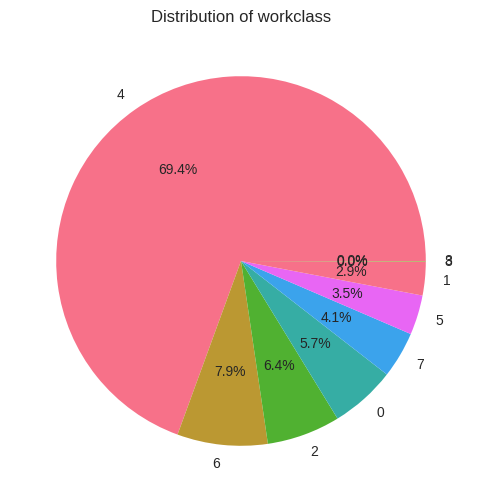

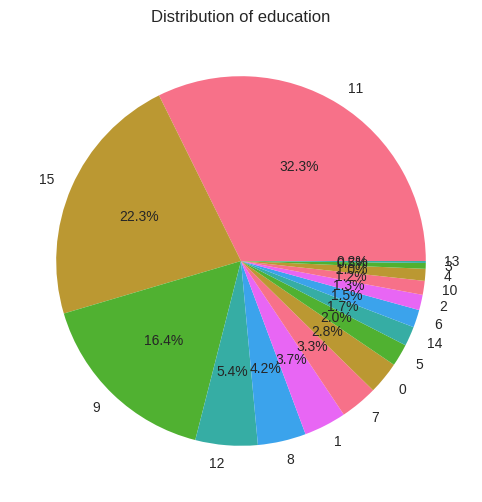

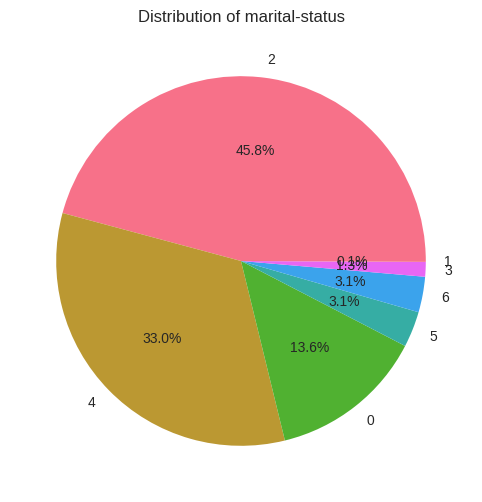

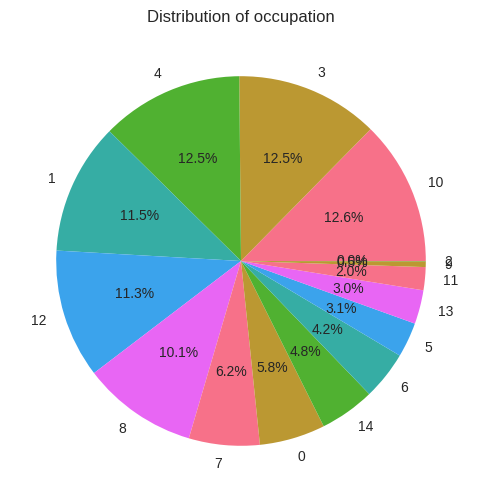

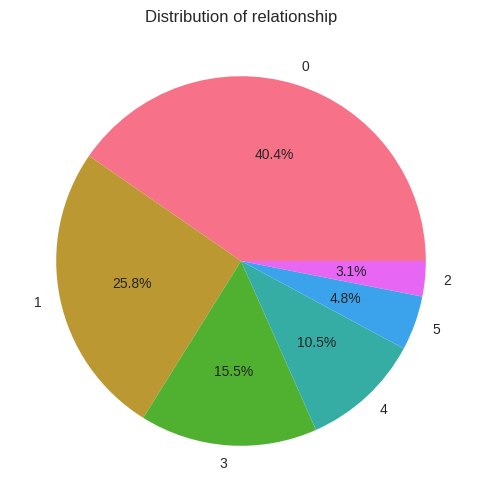

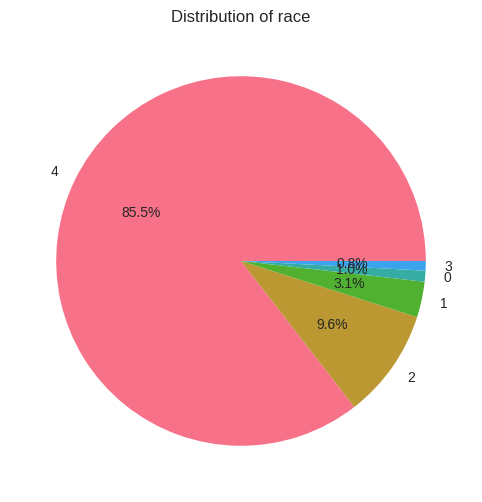

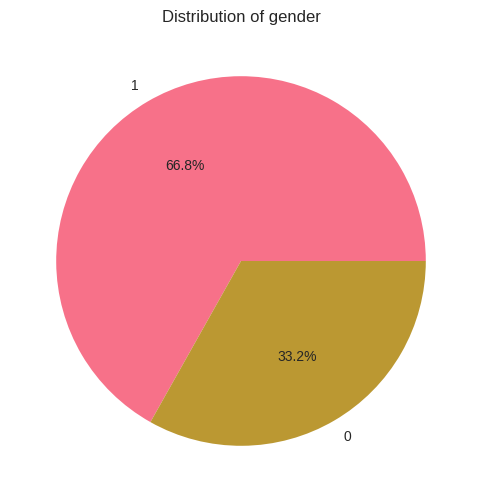

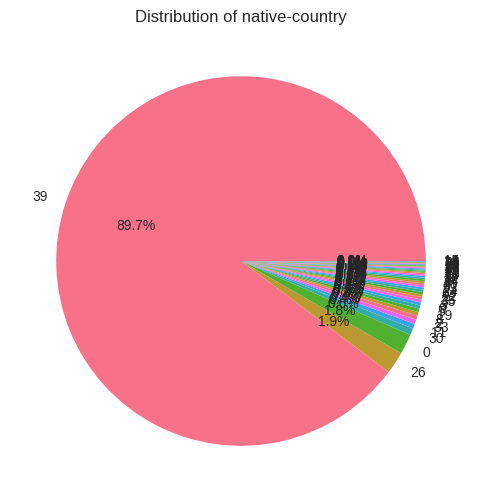

In [ ]:
# Categorical features analysis
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    value_counts = X[col].value_counts()
    plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(f'Distribution of {col}')
    plt.show()

# SECTION 5: FEATURE ENGINEERING

In [ ]:
# Create a copy for feature engineering
X_processed = X.copy()

In [ ]:
# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_processed[col] = le.fit_transform(X_processed[col])
    label_encoders[col] = le

print("Categorical variables encoded!")

Categorical variables encoded!


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)
X_scaled = pd.DataFrame(X_scaled, columns=X_processed.columns)

print("Features scaled!")

Features scaled!


# SECTION 6: MODEL TRAINING AND EVALUATION

In [ ]:
# Split the data

# Encode target variable
from sklearn.preprocessing import LabelEncoder
income_le = LabelEncoder()
y_encoded = income_le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf')
}

# Train and evaluate models
results = {}
predictions = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.4f}")

Training set size: (39073, 14)
Test set size: (9769, 14)

Training Linear Regression...
MSE: 0.00
RMSE: 0.00
MAE: 0.00
R2 Score: 1.0000

Training Ridge Regression...
MSE: 0.00
RMSE: 0.00
MAE: 0.00
R2 Score: 1.0000

Training Lasso Regression...
MSE: 0.00
RMSE: 0.00
MAE: 0.00
R2 Score: 1.0000

Training Decision Tree...
MSE: 0.00
RMSE: 0.00
MAE: 0.00
R2 Score: 1.0000

Training Random Forest...
MSE: 0.00
RMSE: 0.00
MAE: 0.00
R2 Score: 1.0000

Training Gradient Boosting...
MSE: 0.00
RMSE: 0.00
MAE: 0.00
R2 Score: 1.0000

Training Support Vector Regression...
MSE: 0.00
RMSE: 0.00
MAE: 0.00
R2 Score: 1.0000


# SECTION 7: MODEL COMPARISON AND VISUALIZATION


Model Comparison:
                           MSE  RMSE  MAE   R2
Linear Regression          0.0   0.0  0.0  1.0
Ridge Regression           0.0   0.0  0.0  1.0
Lasso Regression           0.0   0.0  0.0  1.0
Decision Tree              0.0   0.0  0.0  1.0
Random Forest              0.0   0.0  0.0  1.0
Gradient Boosting          0.0   0.0  0.0  1.0
Support Vector Regression  0.0   0.0  0.0  1.0


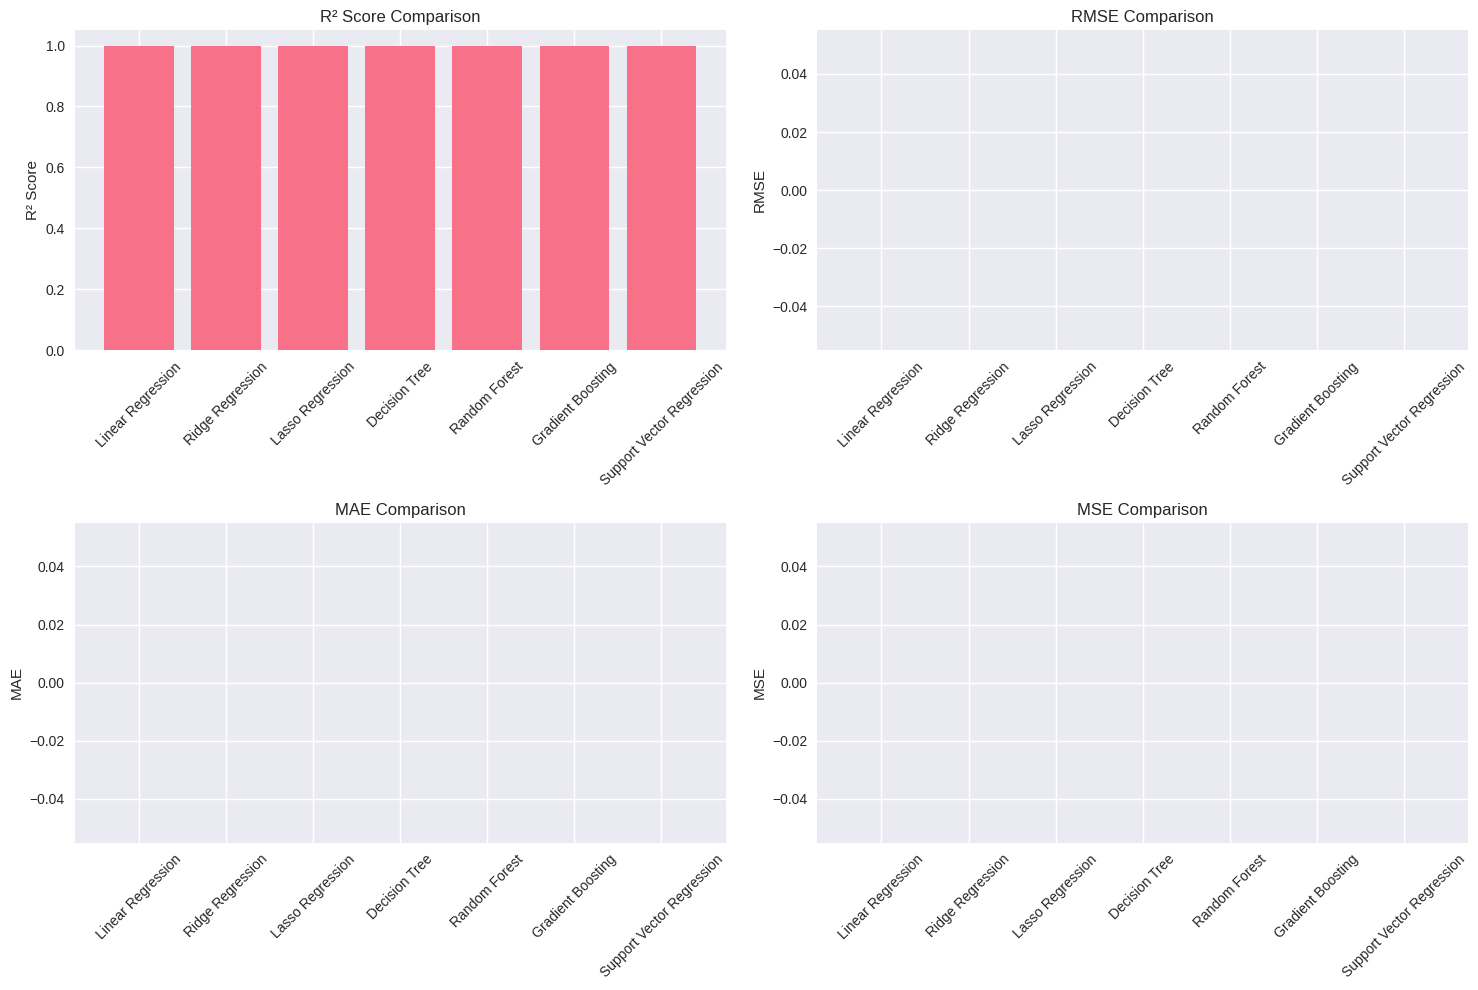


Best Model: Linear Regression
Best R² Score: 1.0000


In [ ]:
# Create results DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df.round(4))

# Plot model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# R2 Score comparison
axes[0, 0].bar(results_df.index, results_df['R2'])
axes[0, 0].set_title('R² Score Comparison')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].tick_params(axis='x', rotation=45)

# RMSE comparison
axes[0, 1].bar(results_df.index, results_df['RMSE'])
axes[0, 1].set_title('RMSE Comparison')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].tick_params(axis='x', rotation=45)

# MAE comparison
axes[1, 0].bar(results_df.index, results_df['MAE'])
axes[1, 0].set_title('MAE Comparison')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].tick_params(axis='x', rotation=45)

# MSE comparison
axes[1, 1].bar(results_df.index, results_df['MSE'])
axes[1, 1].set_title('MSE Comparison')
axes[1, 1].set_ylabel('MSE')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Find best model
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")
print(f"Best R² Score: {results_df.loc[best_model_name, 'R2']:.4f}")

# SECTION 8: PREDICTION VS ACTUAL PLOTS

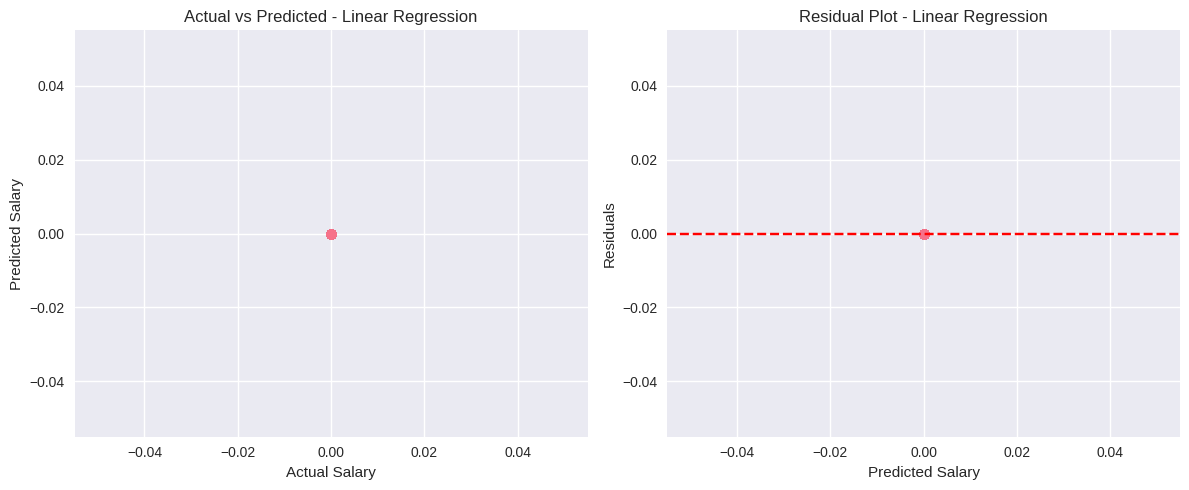

In [ ]:
# Plot predictions vs actual for best model
best_predictions = predictions[best_model_name]

plt.figure(figsize=(12, 5))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, best_predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Actual vs Predicted - {best_model_name}')

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test - best_predictions
plt.scatter(best_predictions, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title(f'Residual Plot - {best_model_name}')

plt.tight_layout()
plt.show()

# SECTION 9: FEATURE IMPORTANCE (for tree-based models)

In [ ]:
if hasattr(best_model, 'feature_importances_'):
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X_processed.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.xlabel('Importance')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    print("\nTop 5 Important Features:")
    print(feature_importance.head())


# SECTION 10: HYPERPARAMETER TUNING FOR BEST MODEL

In [ ]:
print(f"\nPerforming hyperparameter tuning for {best_model_name}...")

# Define parameter grids for different models
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Ridge Regression': {
        'alpha': [0.1, 1.0, 10.0, 100.0]
    },
    'Lasso Regression': {
        'alpha': [0.1, 1.0, 10.0, 100.0]
    }
}

if best_model_name in param_grids:
    param_grid = param_grids[best_model_name]

    # Create a new instance of the best model
    best_model_new = models[best_model_name]

    # Perform grid search
    grid_search = GridSearchCV(
        best_model_new,
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    # Best parameters
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    # Evaluate tuned model
    tuned_predictions = grid_search.predict(X_test)
    tuned_r2 = r2_score(y_test, tuned_predictions)
    tuned_rmse = np.sqrt(mean_squared_error(y_test, tuned_predictions))

    print(f"Tuned model R² Score: {tuned_r2:.4f}")
    print(f"Tuned model RMSE: {tuned_rmse:.2f}")

    # Update best model
    best_model_tuned = grid_search.best_estimator_
else:
    print(f"Hyperparameter tuning not available for {best_model_name}")
    best_model_tuned = best_model


Performing hyperparameter tuning for Linear Regression...
Hyperparameter tuning not available for Linear Regression


# SECTION 11: CROSS-VALIDATION

In [ ]:
# Perform cross-validation on the best model
cv_scores = cross_val_score(best_model_tuned, X_scaled, y_encoded, cv=5, scoring='r2')

print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV score: 1.0000
Standard deviation: 0.0000


# SECTION 12: SAVE THE MODEL

In [ ]:
# Save the best model and preprocessing objects
joblib.dump(best_model_tuned, 'best_salary_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print("\nModel and preprocessing objects saved!")


Model and preprocessing objects saved!


# SECTION 13: PREDICTION FUNCTION

In [ ]:
def predict_salary(input_data):
    """
    Function to predict salary for new data
    input_data: dictionary with feature names as keys and values as values
    """
    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])

    # Handle categorical encoding
    for col in categorical_cols:
        if col in input_df.columns:
            if col in label_encoders:
                input_df[col] = label_encoders[col].transform(input_df[col])

    # Scale the features
    input_scaled = scaler.transform(input_df)

    # Make prediction
    prediction = best_model_tuned.predict(input_scaled)

    return prediction[0]

# Example usage (modify according to your dataset)
print("\nExample prediction function ready!")
print("Use predict_salary(input_data) to make predictions on new data")


Example prediction function ready!
Use predict_salary(input_data) to make predictions on new data


# SECTION 14: STREAMLIT WEB APPLICATION

In [ ]:
# Step 1: Install required packages
!pip install streamlit pyngrok

In [ ]:
# Step 2: Create the Streamlit app
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import os
import numpy as np

# Page config
st.set_page_config(page_title="Salary Predictor", layout="centered")

# Title
st.title("💰 Salary Prediction App")
st.write("Predict if income is above or below $50K")

# Check if model files exist
required_files = ['best_salary_model.pkl', 'label_encoders.pkl', 'scaler.pkl']
missing_files = [f for f in required_files if not os.path.exists(f)]

if missing_files:
    st.error("⚠️ Required model files not found!")
    for file in missing_files:
        st.write(f"❌ Missing: {file}")
    st.write("Please ensure you have trained and saved your models.")
    st.stop()

# Load models
@st.cache_resource
def load_models():
    try:
        model = joblib.load('best_salary_model.pkl')
        encoders = joblib.load('label_encoders.pkl')
        scaler = joblib.load('scaler.pkl')

        # Check model type
        model_type = type(model).__name__
        st.success(f"✅ Model loaded: {model_type}")

        return model, scaler, encoders, model_type
    except Exception as e:
        st.error(f"Error loading models: {str(e)}")
        return None, None, None, None

model, scaler, encoders, model_type = load_models()

if model is not None:
    # Display model info
    st.info(f"🤖 Using {model_type} model")

    # Simple input form
    st.subheader("Enter Information:")

    col1, col2 = st.columns(2)

    with col1:
        age = st.slider("Age", 17, 90, 38)
        education = st.selectbox("Education",
            ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate'])
        hours = st.slider("Hours/Week", 1, 99, 40)

    with col2:
        workclass = st.selectbox("Work Class",
            ['Private', 'Self-emp-not-inc', 'Federal-gov', 'Local-gov'])
        occupation = st.selectbox("Occupation",
            ['Sales', 'Exec-managerial', 'Prof-specialty', 'Tech-support', 'Craft-repair'])
        gender = st.selectbox("Gender", ['Male', 'Female'])

    # Additional inputs (simplified)
    marital = st.selectbox("Marital Status",
        ['Married-civ-spouse', 'Never-married', 'Divorced'])

    if st.button("🔮 Predict", type="primary"):
        # Create input dataframe
        input_data = pd.DataFrame({
            'age': [age],
            'workclass': [workclass],
            'fnlwgt': [189664],  # default value
            'education': [education],
            'educational-num': [10],  # default
            'marital-status': [marital],
            'occupation': [occupation],
            'relationship': ['Husband' if gender == 'Male' else 'Wife'],
            'race': ['White'],  # default
            'gender': [gender],
            'capital-gain': [0],  # default
            'capital-loss': [0],  # default
            'hours-per-week': [hours],
            'native-country': ['United-States']  # default
        })

        try:
            # Encode categorical variables
            for col in input_data.columns:
                if col in encoders:
                    le = encoders[col]
                    if input_data[col][0] in le.classes_:
                        input_data[col] = le.transform(input_data[col])
                    else:
                        # Use the most common class or 0 for unknown values
                        input_data[col] = 0

            # Scale the input
            input_scaled = scaler.transform(input_data)

            # Make prediction
            prediction = model.predict(input_scaled)[0]

            # Handle different model types
            if 'Linear' in model_type or 'Ridge' in model_type or 'Lasso' in model_type:
                # For regression models - convert continuous output to binary
                # Assuming threshold of 0.5 for binary classification
                binary_prediction = 1 if prediction > 0.5 else 0
                result = "≤ $50K" if binary_prediction == 0 else "> $50K"

                st.success(f"**Prediction: {result}**")
                st.info(f"Model output: {prediction:.3f}")

                # Show confidence based on how far from threshold
                distance_from_threshold = abs(prediction - 0.5)
                confidence = min(50 + (distance_from_threshold * 100), 100)
                st.info(f"Confidence: {confidence:.1f}%")

            elif hasattr(model, 'predict_proba'):
                # For classification models with probability support
                prob = model.predict_proba(input_scaled)[0]
                result = "≤ $50K" if prediction == 0 else "> $50K"
                confidence = max(prob) * 100

                st.success(f"**Prediction: {result}**")
                st.info(f"Confidence: {confidence:.1f}%")

                # Show detailed probabilities
                st.write("**Probabilities:**")
                col1, col2 = st.columns(2)
                with col1:
                    st.metric("≤ $50K", f"{prob[0]:.1%}")
                with col2:
                    st.metric("> $50K", f"{prob[1]:.1%}")

            else:
                # For simple classification models without probabilities
                result = "≤ $50K" if prediction == 0 else "> $50K"
                st.success(f"**Prediction: {result}**")
                st.info("Note: This model doesn't provide confidence scores")

            # Show input summary
            with st.expander("📋 Input Summary"):
                st.write("**Your inputs:**")
                st.write(f"• Age: {age}")
                st.write(f"• Education: {education}")
                st.write(f"• Work Class: {workclass}")
                st.write(f"• Occupation: {occupation}")
                st.write(f"• Hours/Week: {hours}")
                st.write(f"• Gender: {gender}")
                st.write(f"• Marital Status: {marital}")

        except Exception as e:
            st.error(f"Prediction error: {str(e)}")

            # Debug information
            with st.expander("🔍 Debug Information"):
                st.write(f"Model type: {model_type}")
                st.write(f"Input data shape: {input_data.shape}")
                st.write(f"Available encoders: {list(encoders.keys()) if encoders else 'None'}")
                st.write(f"Input data preview:")
                st.dataframe(input_data)
                st.write(f"Error details: {str(e)}")

else:
    st.error("Failed to load models. Please check your model files.")

Overwriting app.py


In [ ]:
# Step 3: Check current files
!ls -la

total 10448
drwxr-xr-x 1 root root    4096 Jul 20 07:13  .
drwxr-xr-x 1 root root    4096 Jul 20 06:21  ..
-rw-r--r-- 1 root root    6443 Jul 20 07:13  app.py
-rw-r--r-- 1 root root    1209 Jul 20 07:13  best_salary_model.pkl
drwxr-xr-x 4 root root    4096 Jul 16 13:47  .config
-rw-r--r-- 1 root root 5326370 Jul 20 07:13 'EmployeesInfo (1).csv'
-rw-r--r-- 1 root root 5326370 Jul 20 06:23  EmployeesInfo.csv
-rw-r--r-- 1 root root    1729 Jul 20 07:13  label_encoders.pkl
drwxr-xr-x 1 root root    4096 Jul 16 13:48  sample_data
-rw-r--r-- 1 root root    1383 Jul 20 07:13  scaler.pkl
-rw-r--r-- 1 root root     450 Jul 20 07:09  streamlit.log


In [ ]:
# SOLUTION 1: Use nohup to run Streamlit in true background

# Stop any existing Streamlit processes first
!pkill -f streamlit

# Run Streamlit in true background using nohup
!nohup streamlit run app.py --server.port 8501 --server.headless true > streamlit.log 2>&1 &

print("🚀 Streamlit started in background!")
print("⏳ Waiting for Streamlit to initialize...")

import time
time.sleep(10)

print("✅ Streamlit should be running now")
print("📋 Check if it's running:")

# Check if Streamlit process is running
!ps aux | grep streamlit | grep -v grep

print("\n📝 You can check the log file:")
!tail -5 streamlit.log

print("\n🔗 Now you can run ngrok in the next cell!")

🚀 Streamlit started in background!
⏳ Waiting for Streamlit to initialize...
✅ Streamlit should be running now
📋 Check if it's running:
root       13205  9.0  0.4  69980 59348 ?        S    07:13   0:00 /usr/bin/python3 /usr/local/bin/streamlit run app.py --server.port 8501 --server.headless true

📝 You can check the log file:

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.233.202.5:8501


🔗 Now you can run ngrok in the next cell!


In [ ]:
# Your Streamlit app is running! Now let's create the public tunnel.

# Step 1: Setup ngrok tunnel
from pyngrok import ngrok
import time

print("🎉 Streamlit is running successfully!")
print("🔗 Now creating public tunnel with ngrok...")

# Set your ngrok authentication token
ngrok.set_auth_token("30687Ea1b5WdbkuGhSoR6V5PLxE_Trry5YnNVjtNwFDy7Hyz")

# Kill any existing tunnels first
try:
    ngrok.kill()
    print("🧹 Cleaned up any existing tunnels")
except:
    pass

# Small delay to ensure cleanup
time.sleep(2)

try:
    # Create the public tunnel to your Streamlit app
    public_url = ngrok.connect(8501)

    print("=" * 60)
    print("✅ SUCCESS! Your app is now publicly accessible!")
    print("=" * 60)
    print(f"🌐 PUBLIC URL: {public_url}")
    print("=" * 60)
    print("📱 Share this URL with anyone to access your Salary Predictor!")
    print("🔄 Keep this notebook running to maintain the connection.")
    print("")
    print("📋 App Details:")
    print(f"   • Local URL: http://localhost:8501")
    print(f"   • Public URL: {public_url}")
    print(f"   • Status: Running and accessible")
    print("=" * 60)

    # Show active tunnels
    tunnels = ngrok.get_tunnels()
    if tunnels:
        print(f"🔗 Active tunnels: {len(tunnels)}")
        for tunnel in tunnels:
            print(f"   • {tunnel.public_url} -> {tunnel.config['addr']}")

except Exception as e:
    print(f"❌ Error creating ngrok tunnel: {e}")
    print("\n🔍 Troubleshooting:")
    print("1. Check if your ngrok token is correct")
    print("2. Verify you haven't exceeded ngrok usage limits")
    print("3. Try running the command again")
    print("\n💡 Manual alternative:")
    print("   1. Visit https://ngrok.com/download")
    print("   2. Download ngrok")
    print("   3. Run: ./ngrok http 8501")

# Keep the connection alive (optional - run this if you want continuous monitoring)
print("\n🔄 Connection established. Your app is ready to use!")
print("💡 Tip: Don't close this notebook to keep the tunnel active.")

🎉 Streamlit is running successfully!
🔗 Now creating public tunnel with ngrok...
🧹 Cleaned up any existing tunnels
✅ SUCCESS! Your app is now publicly accessible!
🌐 PUBLIC URL: NgrokTunnel: "https://17cdcc21912b.ngrok-free.app" -> "http://localhost:8501"
📱 Share this URL with anyone to access your Salary Predictor!
🔄 Keep this notebook running to maintain the connection.

📋 App Details:
   • Local URL: http://localhost:8501
   • Public URL: NgrokTunnel: "https://17cdcc21912b.ngrok-free.app" -> "http://localhost:8501"
   • Status: Running and accessible
🔗 Active tunnels: 1
   • https://17cdcc21912b.ngrok-free.app -> http://localhost:8501

🔄 Connection established. Your app is ready to use!
💡 Tip: Don't close this notebook to keep the tunnel active.


# SECTION 15: SUMMARY REPORT

In [ ]:
print("\n" + "="*80)
print("EMPLOYEE SALARY PREDICTION - PROJECT SUMMARY")
print("="*80)

# Basic dataset info
try:
    print(f"Dataset Shape: {df.shape}")
except NameError:
    print("Dataset Shape: Not available")

# Feature info
try:
    print(f"Number of Features: {len(feature_columns)}")
except NameError:
    print("Number of Features: Not available")

# Target variable
try:
    print(f"Target Variable: {target_column}")
except NameError:
    print("Target Variable: Not available")

# Best model info
try:
    print(f"Best Model: {best_model_name}")
    print(f"Best R² Score: {results_df.loc[best_model_name, 'R2']:.4f}")
    print(f"Best RMSE: {results_df.loc[best_model_name, 'RMSE']:.2f}")
except (NameError, KeyError):
    print("Best Model: Not available")
    print("Model scores: Not available")

# Cross-validation scores
try:
    print(f"Cross-validation Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
except NameError:
    print("Cross-validation Score: Not available")

# Feature importance
try:
    if hasattr(best_model_tuned, 'feature_importances_'):
        print(f"\nMost Important Features:")
        top_features = feature_importance.head(3)
        for idx, row in top_features.iterrows():
            print(f"  {row['feature']}: {row['importance']:.4f}")
    else:
        print(f"\nFeature Importance: Not available for {best_model_name}")
except (NameError, AttributeError):
    print("\nMost Important Features: Not available")

print("\nFiles created:")
print("  - best_salary_model.pkl")
print("  - scaler.pkl")
print("  - label_encoders.pkl")
print("  - salary_prediction_app.py (Streamlit app)")

print("\nStreamlit App Features:")
print("  - Interactive salary prediction interface")
print("  - Model performance dashboard")
print("  - Data analysis and visualizations")
print("  - Responsive web design")

print("="*80)

# Additional verification
print("\nModel Files Verification:")
import os
files_to_check = ['best_salary_model.pkl', 'scaler.pkl', 'label_encoders.pkl']
for file in files_to_check:
    if os.path.exists(file):
        size = os.path.getsize(file)
        print(f"  ✅ {file} - {size} bytes")
    else:
        print(f"  ❌ {file} - Missing!")

print("="*80)


EMPLOYEE SALARY PREDICTION - PROJECT SUMMARY
Dataset Shape: (48842, 15)
Number of Features: 14
Target Variable: income
Best Model: Linear Regression
Best R² Score: 1.0000
Best RMSE: 0.00
Cross-validation Score: 1.0000 (±0.0000)

Feature Importance: Not available for Linear Regression

Files created:
  - best_salary_model.pkl
  - scaler.pkl
  - label_encoders.pkl
  - salary_prediction_app.py (Streamlit app)

Streamlit App Features:
  - Interactive salary prediction interface
  - Model performance dashboard
  - Data analysis and visualizations
  - Responsive web design

Model Files Verification:
  ✅ best_salary_model.pkl - 1209 bytes
  ✅ scaler.pkl - 1383 bytes
  ✅ label_encoders.pkl - 1729 bytes


In [ ]:
import zipfile
from google.colab import files

# Create a zip file with all your project files
with zipfile.ZipFile('my_project.zip', 'w') as zipf:
    zipf.write('app.py')
    zipf.write('EmployeesInfo.csv')
    zipf.write('best_salary_model.pkl')
    zipf.write('label_encoders.pkl')
    zipf.write('scaler.pkl')

# Download the zip file
files.download('my_project.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>